In [1]:
mpg<-read.table("auto-mpg.txt",col.names = c("mpg","cylinders","displacement","horsepower","weight","acceleration","year","origin","name"),colClasses = c("numeric","integer","numeric","numeric","numeric","numeric","integer","factor","character"),na.strings = "?")
head(mpg)
summary(mpg)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<chr>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   Median : 93.5   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   Mean   :104.5   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:126.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :6                     
  acceleration        year       origin      name          
 Min.   : 8.00   Min.   :70.00   1:249   Length:398        
 1st Qu.:13.82   1st Qu.:73.00   2: 70   Class :character  
 Median :15.50   Median :76.00   3: 79   Mode  :character  
 Mean   :15.57   Mean   :76.01                             
 3rd Qu.:17.18   3rd Qu.:79.00                             


In [35]:
mpg<-na.omit(mpg)

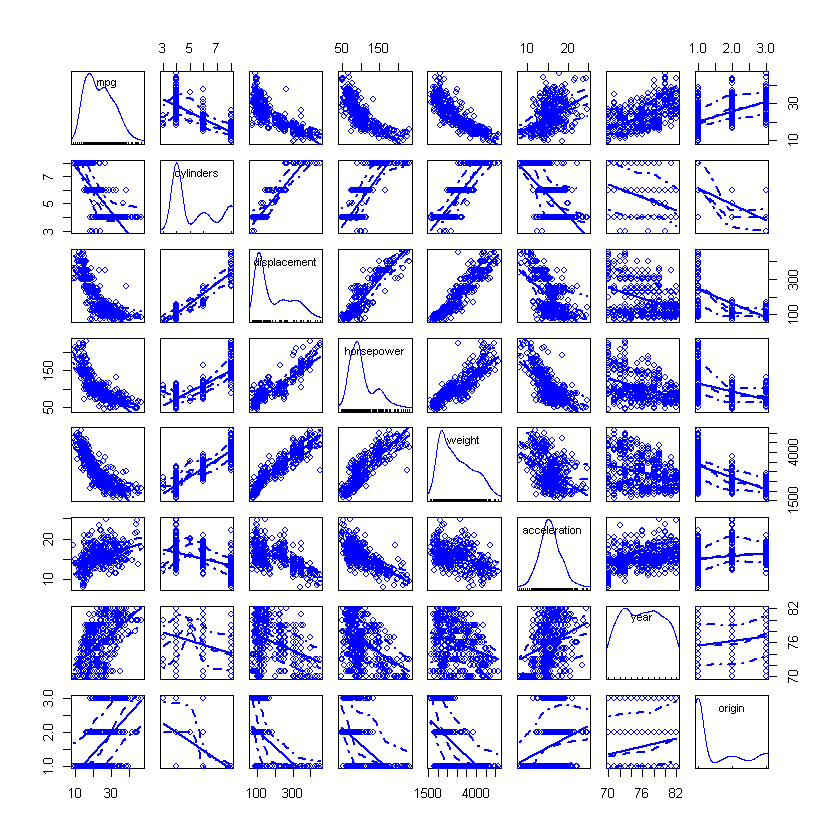

In [2]:
car::scatterplotMatrix(mpg[,-9])

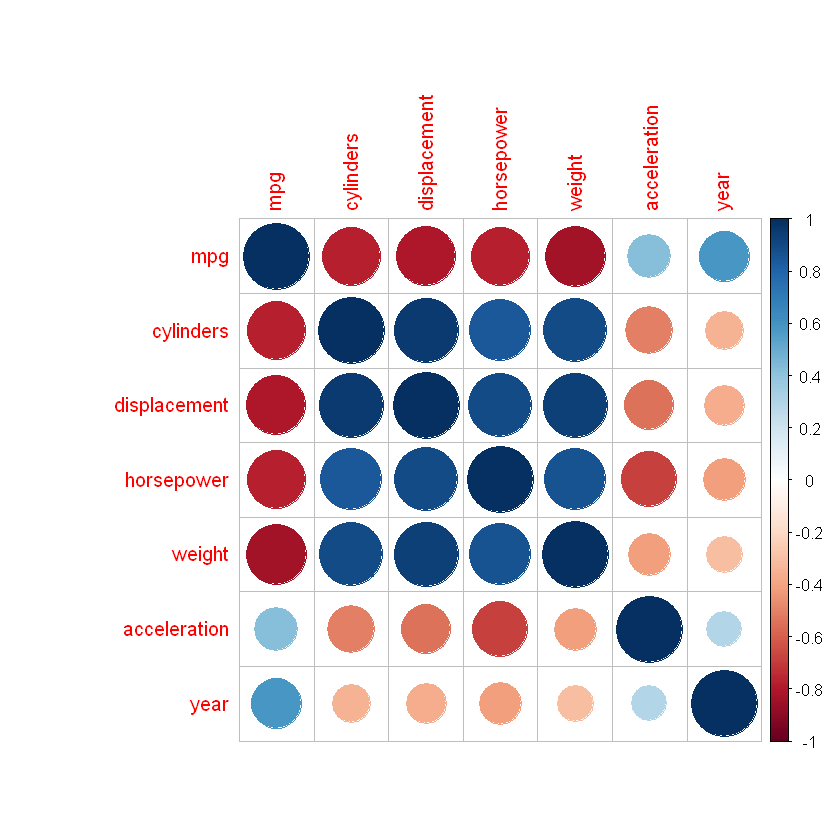

In [23]:
corrplot::corrplot(cor(mpg[,-c(8,9)]))

# Variable Transformation
Since all of the predictors range over less than one order of magnitude, it is not very necessary to transform the predictors. However, from the scatter plot matrix, we see that there seems to be a nonlinear relationship between the response `mpg` and many of the predictors. We then use the Box-Cox transformation and try to find the $\lambda$ that minimizes the $RSS(\lambda)$ (Residual Sum of Squares). This is realized by the `MASS::boxcox()` function.

In [5]:
summary(car::powerTransform(mpg[,3:6]))

bcPower Transformations to Multinormality 
             Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
displacement   -0.0509           0      -0.2082       0.1065
horsepower     -0.1249           0      -0.2693       0.0194
weight         -0.0870           0      -0.2948       0.1208
acceleration    0.3061           0      -0.0255       0.6376

Likelihood ratio test that transformation parameters are equal to 0
 (all log transformations)
                                 LRT df    pval
LR test, lambda = (0 0 0 0) 4.872911  4 0.30059

Likelihood ratio test that no transformations are needed
                                 LRT df       pval
LR test, lambda = (1 1 1 1) 390.0777  4 < 2.22e-16

lambda,RSS
<dbl>,<dbl>
-0.37207,2339.654
-1.00000,2590.510
0.00000,2426.553
1.00000,3451.246


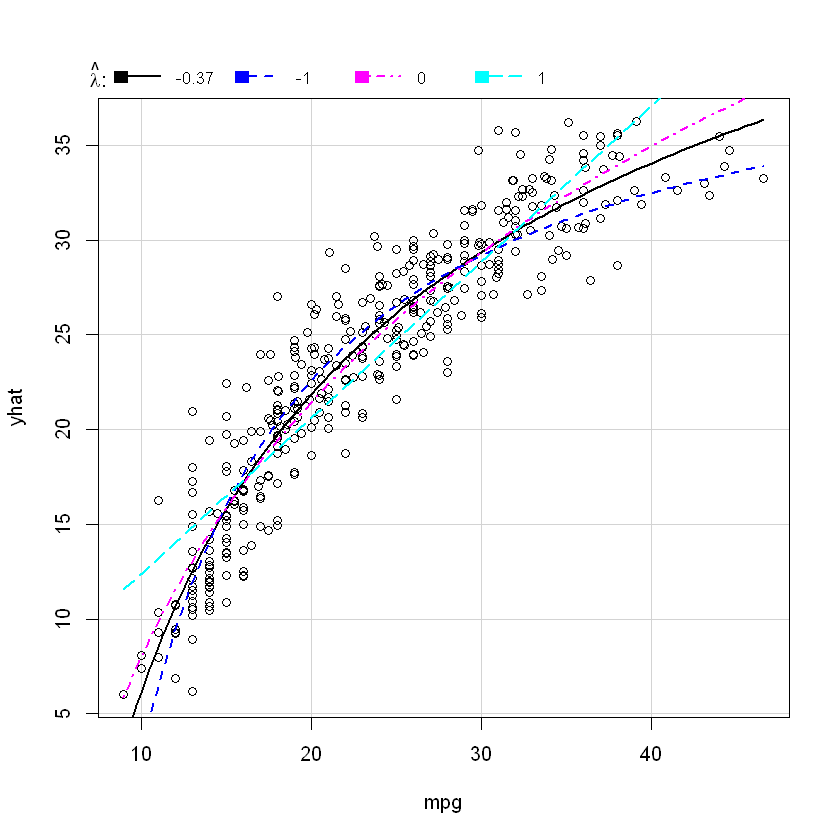

In [42]:
car::inverseResponsePlot(lm(mpg~.,data=mpg[,-9]))

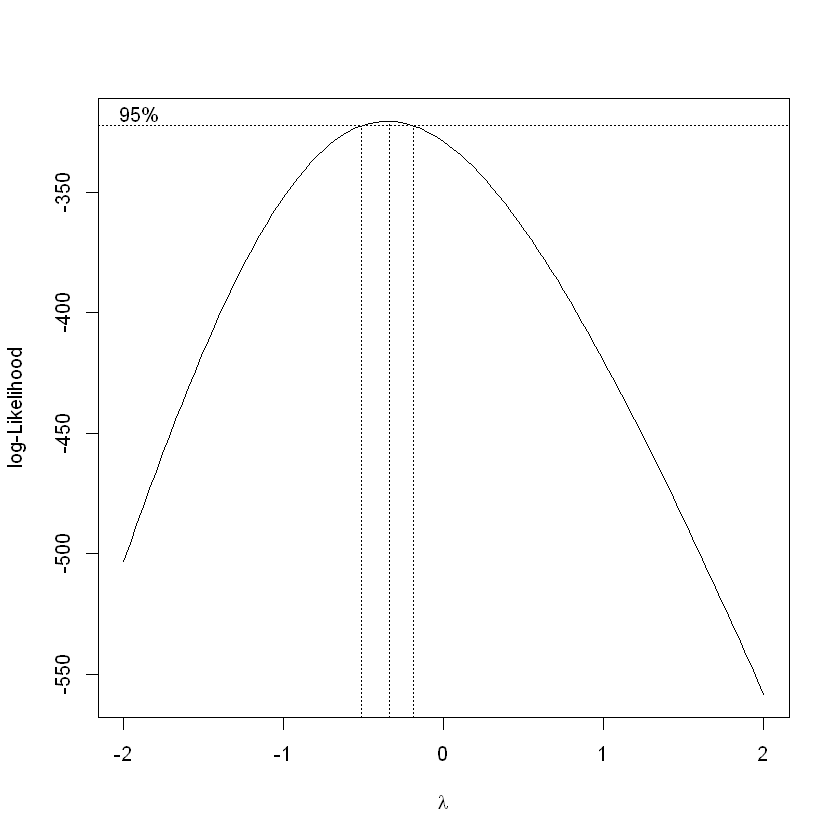

In [52]:
MASS::boxcox(lm(mpg~.,data=mpg[,-9]))

The estimated $\hat \lambda$ is -0.37. It is plausible to consider $\lambda=0$, $\lambda=-0.5$, or $\lambda=-1$. Nonetheless, it is preferred to use the transformation given by $\lambda=-1$, namely $1/Y$, because it gives a very natural interpretation. Other than the US who uses $\textbf {mpg}$, most areas use the unit $\textbf {L/100km}$ for fuel consumption, which is just proportional to the inverse of its value in mpg.

lambda,RSS
<dbl>,<dbl>
0.6500362,579.0504
-1.0000000,1026.4216
0.0000000,653.6491
1.0000000,601.1815


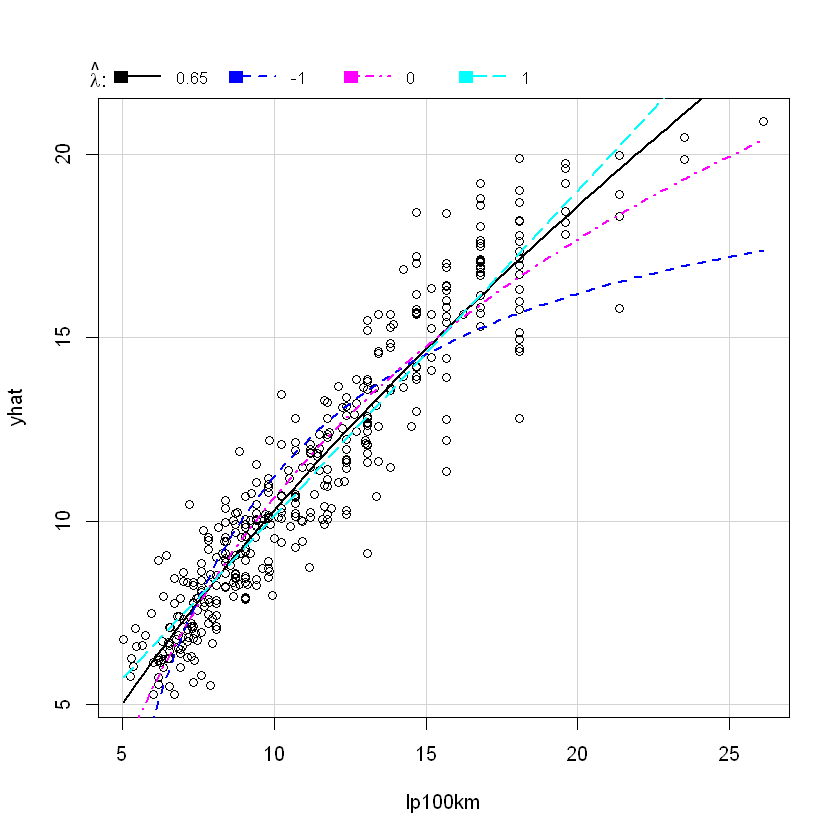

In [7]:
mpg$lp100km<-100/mpg$mpg*0.621371192*3.78541178
car::inverseResponsePlot(lm(lp100km~., data=mpg[,-c(1,9)]))

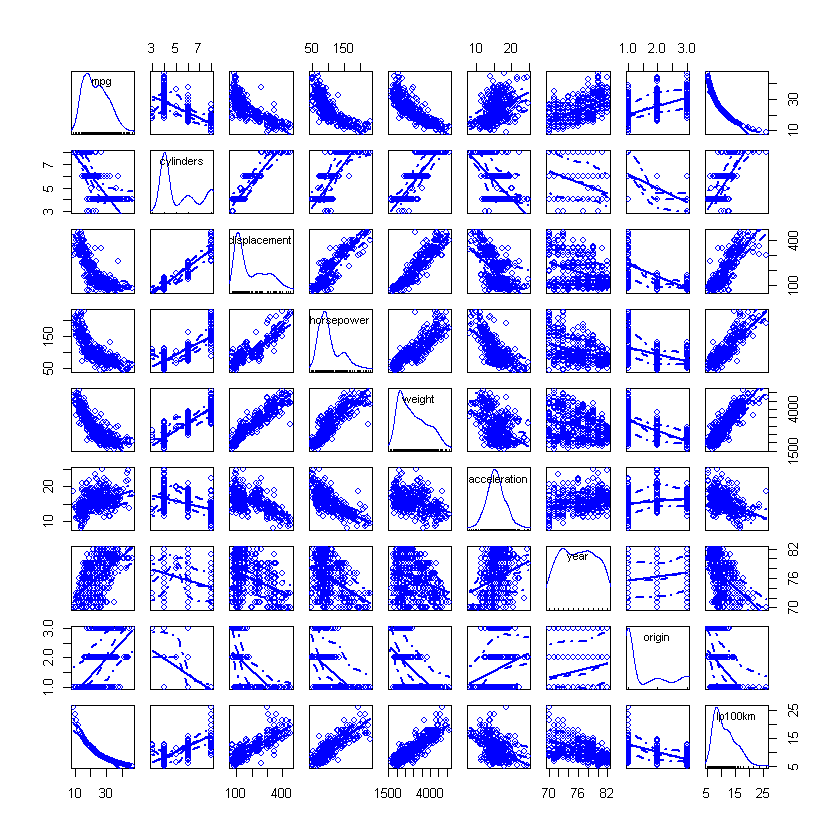

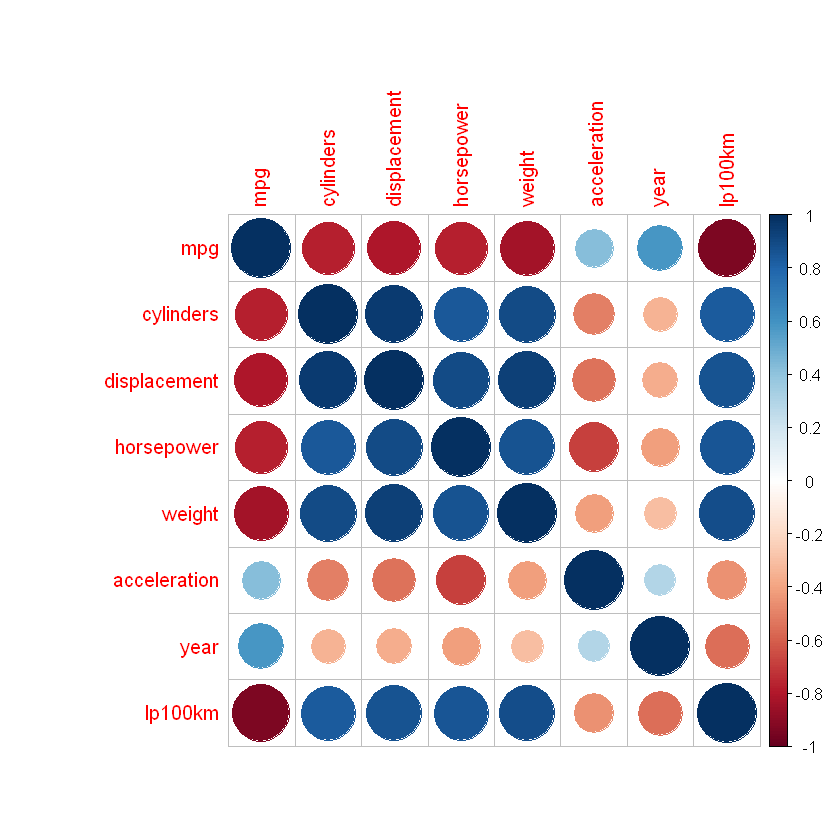

In [8]:
car::scatterplotMatrix(mpg[,-9])
corrplot::corrplot(cor(mpg[,-c(8,9)]))

We hereafter choose `lp100km` as the response variable instead of `mpg`.

# Regression Diagnostic under the Full Model -- Outlier Detection

In [17]:
PCA<-princomp(mpg[,2:6],cor = TRUE)
summary(PCA)
PCA$loadings

Importance of components:
                         Comp.1    Comp.2     Comp.3     Comp.4    Comp.5
Standard deviation     2.017885 0.8329833 0.36536700 0.25351211 0.1910955
Proportion of Variance 0.814372 0.1387722 0.02669861 0.01285368 0.0073035
Cumulative Proportion  0.814372 0.9531442 0.97984282 0.99269650 1.0000000


Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
cylinders     0.469  0.223  0.659  0.270  0.473
displacement  0.482  0.179  0.188        -0.836
horsepower    0.474 -0.120 -0.628  0.594  0.122
weight        0.462  0.345 -0.334 -0.703  0.247
acceleration -0.331  0.886 -0.159  0.282       

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

In [42]:
PCA.z<-as.matrix(mpg[,2:6])%*%eigen(cor(mpg[,2:6]))$vectors

In [41]:
summary(lm(mpg$lp100km~1+PCA.z[,1]+PCA.z[,2]))


Call:
lm(formula = mpg$lp100km ~ 1 + PCA.z[, 1] + PCA.z[, 2])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3518 -1.0844  0.0111  0.9419  8.3734 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.364895   0.428950   3.182  0.00158 ** 
PCA.z[, 1]  -0.029985   0.004047  -7.408 8.03e-13 ***
PCA.z[, 2]  -0.033385   0.006041  -5.526 6.00e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.708 on 389 degrees of freedom
Multiple R-squared:  0.8106,	Adjusted R-squared:  0.8096 
F-statistic: 832.4 on 2 and 389 DF,  p-value: < 2.2e-16
